In [1]:
from datetime import datetime, timedelta 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
casino_fig=pd.read_csv('casino_fig_lottery.csv', parse_dates = ['Date'])

In [4]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands
0,2022-01-01,24,1359.955300,62967.457874,4608
1,2022-01-02,20,-1241.391137,65037.907884,3243
2,2022-01-03,4,891.653523,24851.488898,1246
3,2022-01-04,15,946.445071,25162.969649,1773
4,2022-01-05,12,-3033.282951,47579.549384,1977


<Axes: xlabel='Date'>

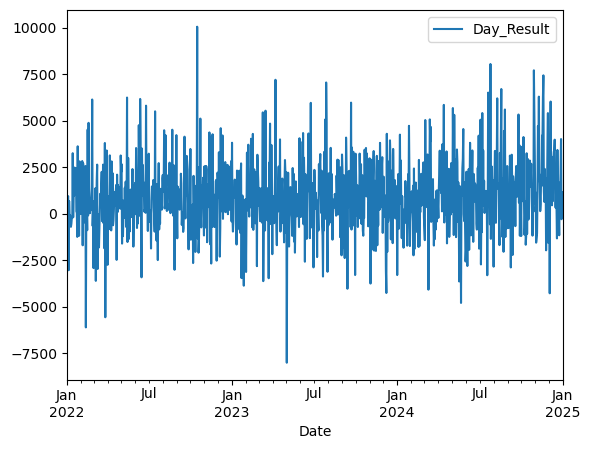

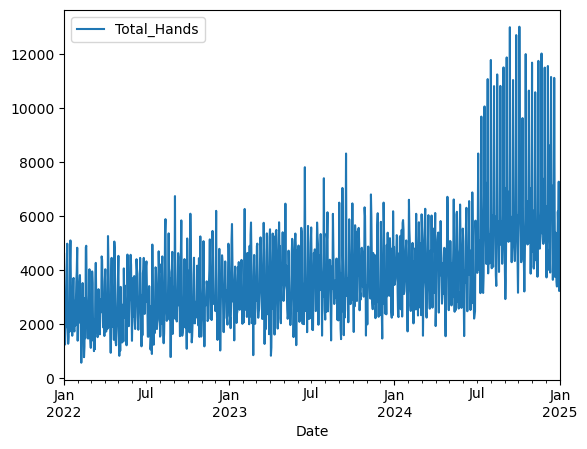

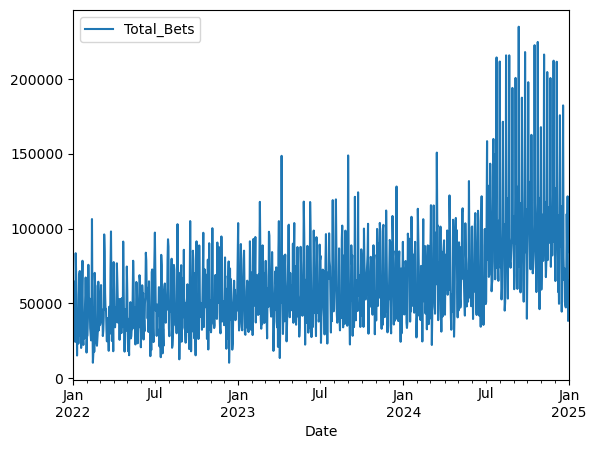

In [5]:
casino_fig[:].plot(x="Date", y ="Day_Result")
casino_fig[:].plot(x="Date", y ="Total_Hands")
casino_fig[:].plot(x="Date", y ="Total_Bets")


In [6]:
coefficients = np.polyfit(casino_fig.index,casino_fig['Total_Bets'], 1)
print(coefficients)

[   53.44078432 35640.14586382]


In [7]:
p = np.poly1d(coefficients)

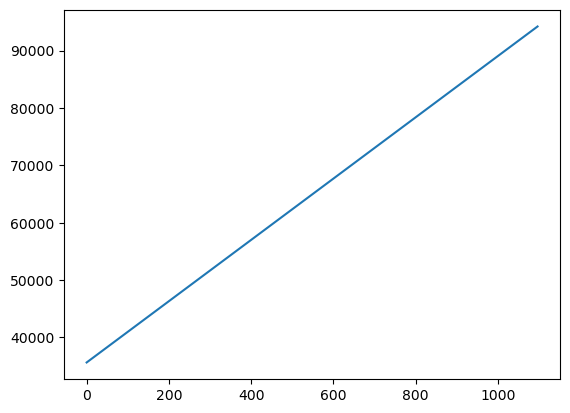

In [8]:
plt.plot(casino_fig.index,p(casino_fig.index))

In [9]:
casino_fig['trend_bet']= p(casino_fig.index)

In [10]:
casino_fig['trend_bet_free'] = casino_fig['Total_Bets']-casino_fig['trend_bet']

<Axes: xlabel='Date'>

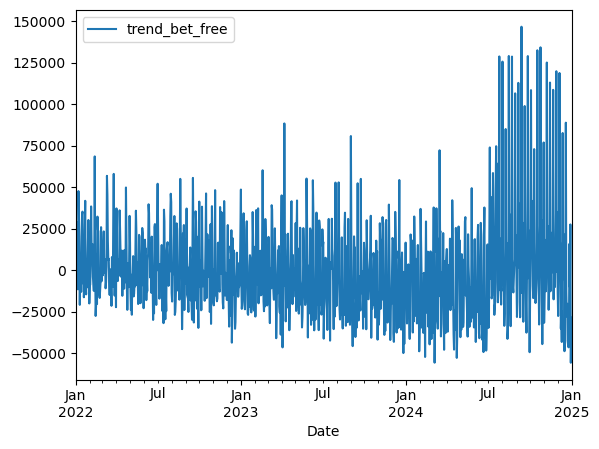

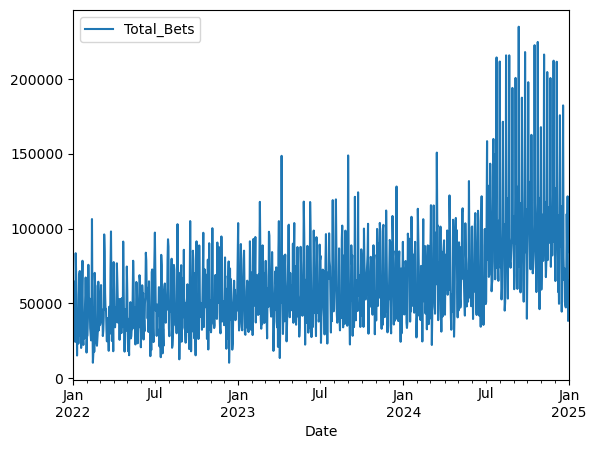

In [11]:
casino_fig.plot(x="Date", y ="trend_bet_free")
casino_fig.plot(x="Date", y ="Total_Bets")

In [12]:
start_lottery_date =  datetime.strptime("01/7/2024", "%d/%m/%Y") - timedelta(days = 4)

In [13]:
casino_fig_wo_lottery = casino_fig[casino_fig['Date'] < start_lottery_date]
casino_fig_with_lottery = casino_fig[casino_fig['Date'] >= start_lottery_date]

In [14]:
casino_fig_wo_lottery['week_day'] = casino_fig_wo_lottery['Date'].dt.dayofweek

/tmp/ipykernel_39611/1986874357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casino_fig_wo_lottery['week_day'] = casino_fig_wo_lottery['Date'].dt.dayofweek


In [15]:
casino_fig_wo_lottery['week_day']

0      5
1      6
2      0
3      1
4      2
      ..
903    5
904    6
905    0
906    1
907    2
Name: week_day, Length: 908, dtype: int32

In [16]:
casino_fig_wo_lottery.groupby('week_day')['trend_bet_free'].mean()

week_day
0   -21178.958557
1   -15664.842538
2    -8835.653612
3   -15852.142116
4    16640.892389
5    21511.311642
6     5318.732769
Name: trend_bet_free, dtype: float64

In [17]:
bet_df =casino_fig_wo_lottery.groupby('week_day')['trend_bet_free'].agg([ 'mean','std'])

In [18]:
bet_df['low_res'] = bet_df['mean'] - 2* bet_df['std']
bet_df['high_res'] = bet_df['mean'] + 2* bet_df['std']

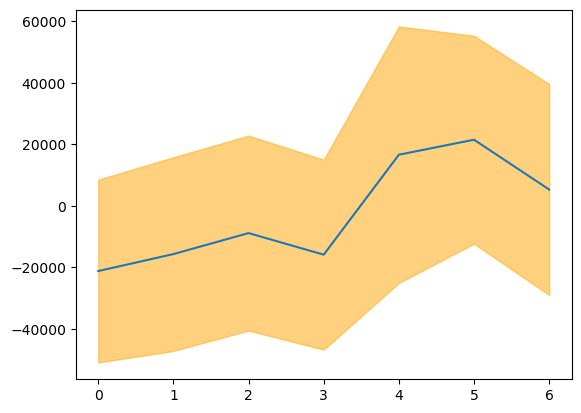

In [19]:
plt.plot(bet_df.index ,bet_df['mean'] )
plt.fill_between(bet_df.index, bet_df['low_res'], bet_df['high_res'], alpha=0.5, color='orange')

In [20]:
casino_fig_with_lottery['week_day'] = casino_fig_with_lottery['Date'].dt.dayofweek
casino_fig_with_lottery.groupby('week_day')['trend_bet_free'].mean()
bet_lottery_df =casino_fig_with_lottery.groupby('week_day')['trend_bet_free'].agg([ 'mean','std'])
bet_lottery_df['low_res'] = bet_lottery_df['mean'] - 2* bet_lottery_df['std']
bet_lottery_df['high_res'] = bet_lottery_df['mean'] + 2* bet_lottery_df['std']

/tmp/ipykernel_39611/1180433142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casino_fig_with_lottery['week_day'] = casino_fig_with_lottery['Date'].dt.dayofweek


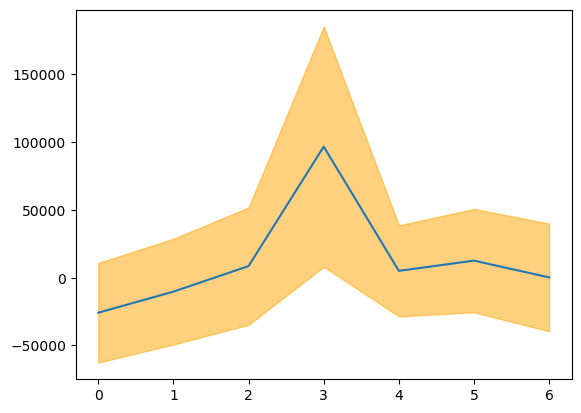

In [21]:
plt.plot(bet_lottery_df.index ,bet_lottery_df['mean'] )
plt.fill_between(bet_lottery_df.index, bet_lottery_df['low_res'], bet_lottery_df['high_res'], alpha=0.5, color='orange')

In [22]:
bet_df['mean'] = bet_df['mean'] - (bet_df['mean'] - bet_lottery_df['mean']).max()

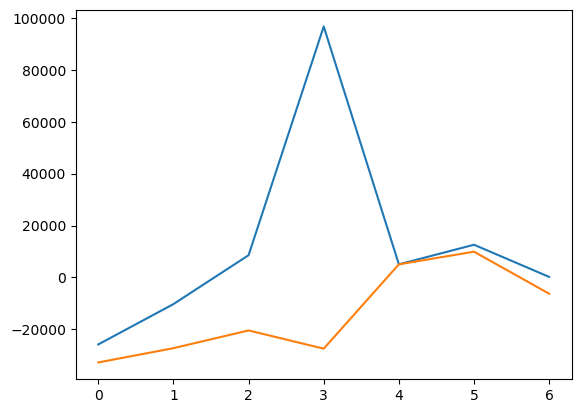

In [23]:
plt.plot(bet_lottery_df.index ,bet_lottery_df['mean'] )
plt.plot(bet_df.index ,bet_df['mean'])

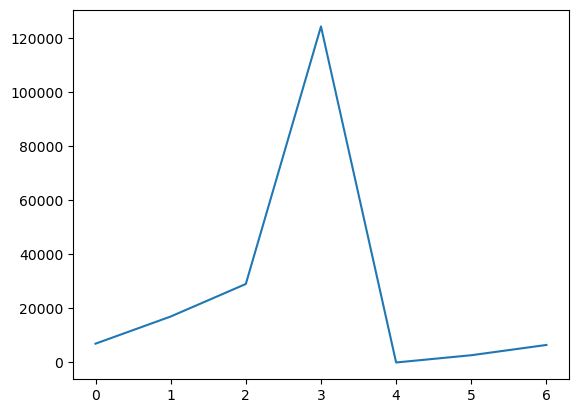

In [25]:
plt.plot(bet_df.index , bet_lottery_df['mean'] - bet_df['mean'] )